In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/realaryagupta/Cardiovascular-Disease-Risk-Prediction/refs/heads/main/dataset/framingham.csv')

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
data.drop('education', axis=1, inplace=True)

In [8]:
# renaming TenYearCHD to CHD
data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.14, random_state=0)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

## Exploratory Data Analysis

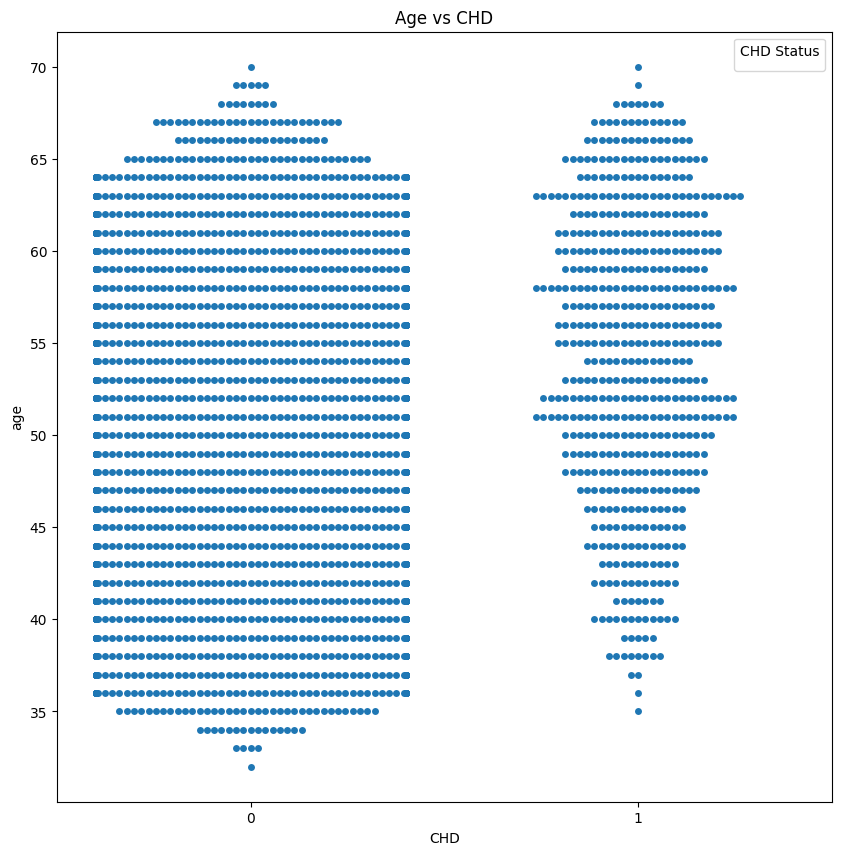

In [12]:
# Age vs CHD
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data)

## Add legend and save image
plt.title('Age vs CHD')
plt.legend(title='CHD Status')
plt.savefig('age_vs_chd.png', bbox_inches='tight', dpi=300)
plt.show()

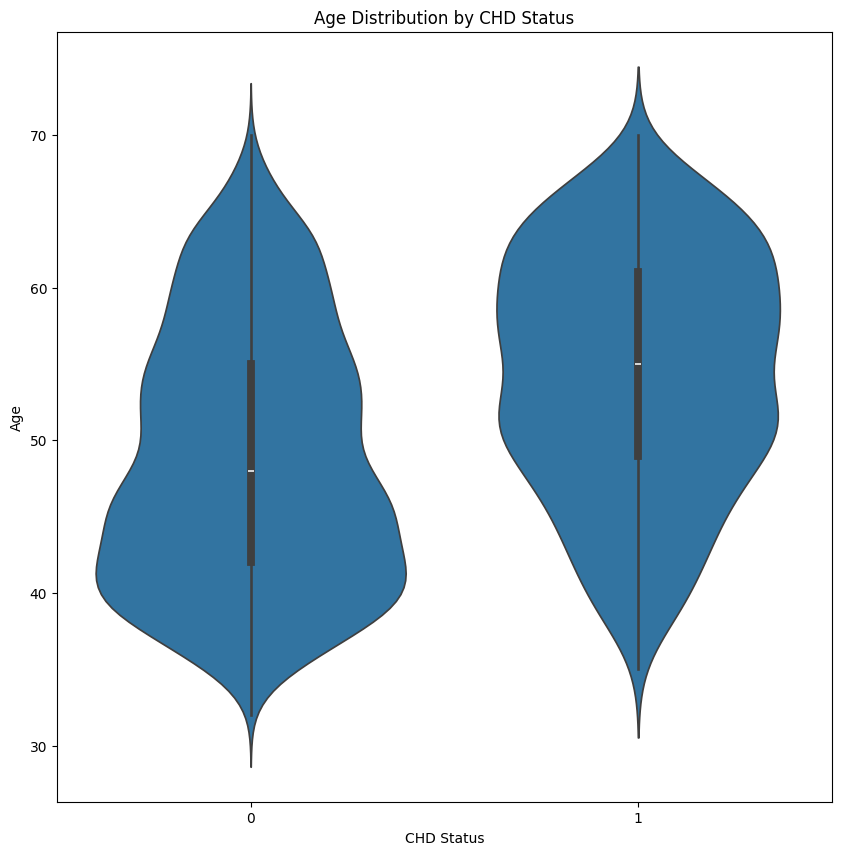

In [13]:
## Age vs CHD (Violin Plot)
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data)

## Add title and labels
plt.title('Age Distribution by CHD Status')
plt.xlabel('CHD Status')
plt.ylabel('Age')

plt.savefig('age_vs_chd_violin.png', bbox_inches='tight', dpi=300)

## Show plot
plt.show()

Violinplot tells that most patients of age around 40-55 have 0 risk

Most patients of age around 60-65 have risk of disease (CHD)

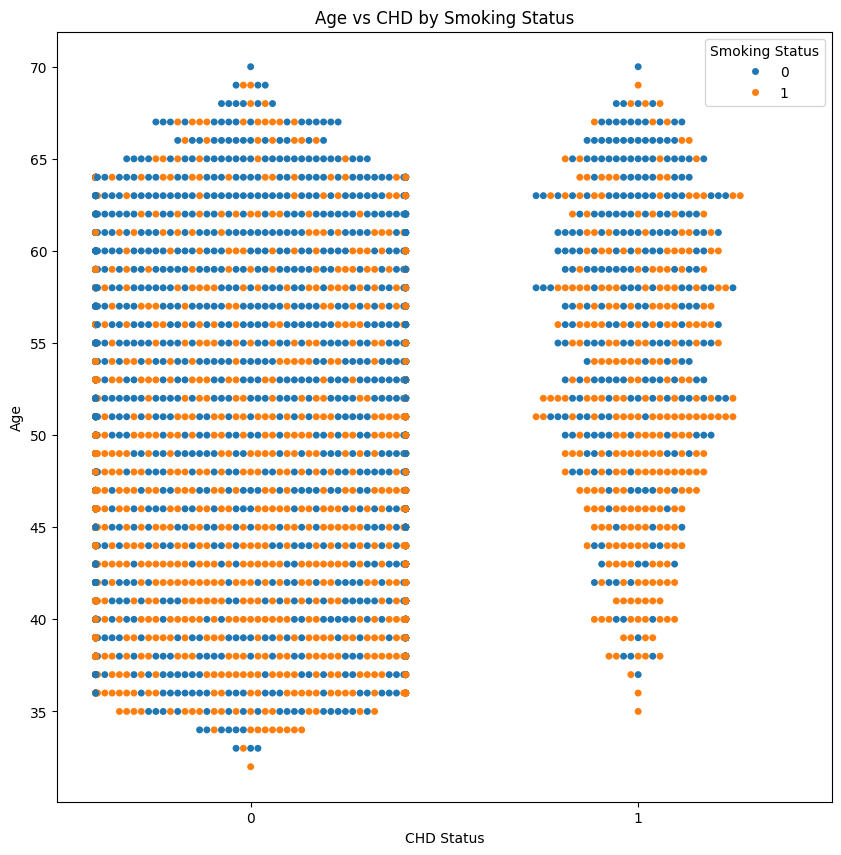

<Figure size 640x480 with 0 Axes>

In [14]:
## Age vs CHD for Smokers/Non-Smokers
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data, hue='currentSmoker')

## Add title and labels
plt.title('Age vs CHD by Smoking Status')
plt.xlabel('CHD Status')
plt.ylabel('Age')
plt.legend(title='Smoking Status')

## Show plot
plt.show()

## Save plot
plt.savefig('age_vs_chd_smoking_status.png', bbox_inches='tight', dpi=300)

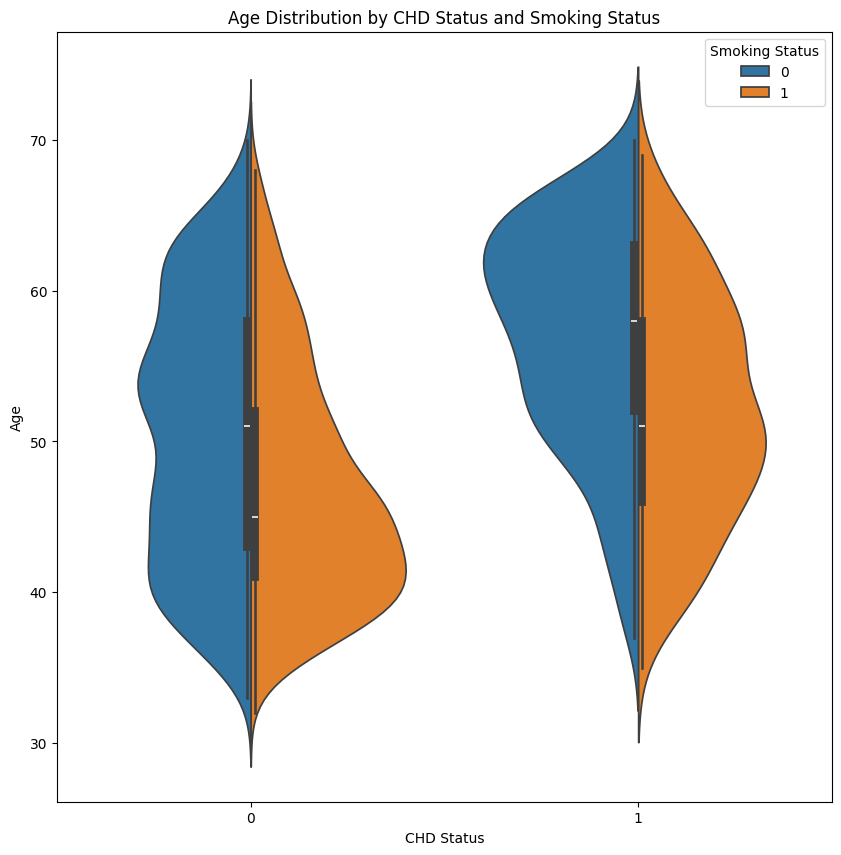

<Figure size 640x480 with 0 Axes>

In [15]:
## Age vs CHD for Smokers/Non-Smokers (Violin Plot)
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data, hue='currentSmoker', split=True)

## Add title and labels
plt.title('Age Distribution by CHD Status and Smoking Status')
plt.xlabel('CHD Status')
plt.ylabel('Age')
plt.legend(title='Smoking Status')

## Show plot
plt.show()

## Save plot
plt.savefig('age_vs_chd_smoking_status_violin.png', bbox_inches='tight', dpi=300)

From this violinplot, we see that most of smokers having no risk of CHD are in age around 40 years

But most of non-smokers having risk are in age around 65-70 years Also most smokers having risk are in age around 50 years

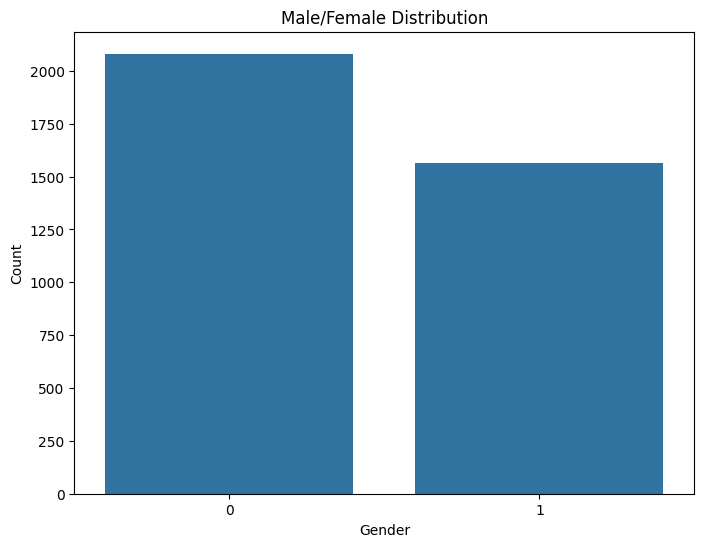

<Figure size 640x480 with 0 Axes>

In [16]:
## Male/Female Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='male', data=train_data)

## Add title and labels
plt.title('Male/Female Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

## Show plot
plt.show()

## Save plot
plt.savefig('male_female_distribution.png', bbox_inches='tight', dpi=300)

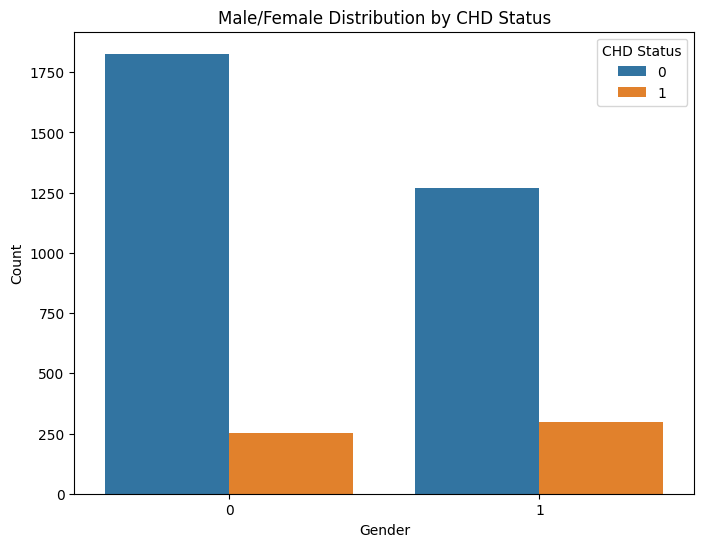

<Figure size 640x480 with 0 Axes>

In [17]:
## Male/Female Distribution by CHD Status
plt.figure(figsize=(8,6))
sns.countplot(x='male', hue='CHD', data=train_data)

## Add title and labels
plt.title('Male/Female Distribution by CHD Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='CHD Status')

## Show plot
plt.show()

## Save plot
plt.savefig('male_female_chd_distribution.png', bbox_inches='tight', dpi=300)

Here from the above countplot, we see that most data are females

There are more females having no risk than males having no risk

There are slightly more males having risk than females having risk

In [18]:
train_data.iloc[:,:5]

,male,age,currentSmoker,cigsPerDay,BPMeds
1073,1,48,0,0.0,0.0
953,0,39,1,5.0,0.0
2584,0,43,1,1.0,0.0
3068,0,46,1,30.0,0.0
1826,0,38,0,0.0,0.0
...,...,...,...,...,...
1033,0,44,0,0.0,0.0
3264,0,51,1,2.0,0.0
1653,1,39,1,20.0,0.0
2607,0,57,0,0.0,0.0


<Figure size 2000x1500 with 0 Axes>

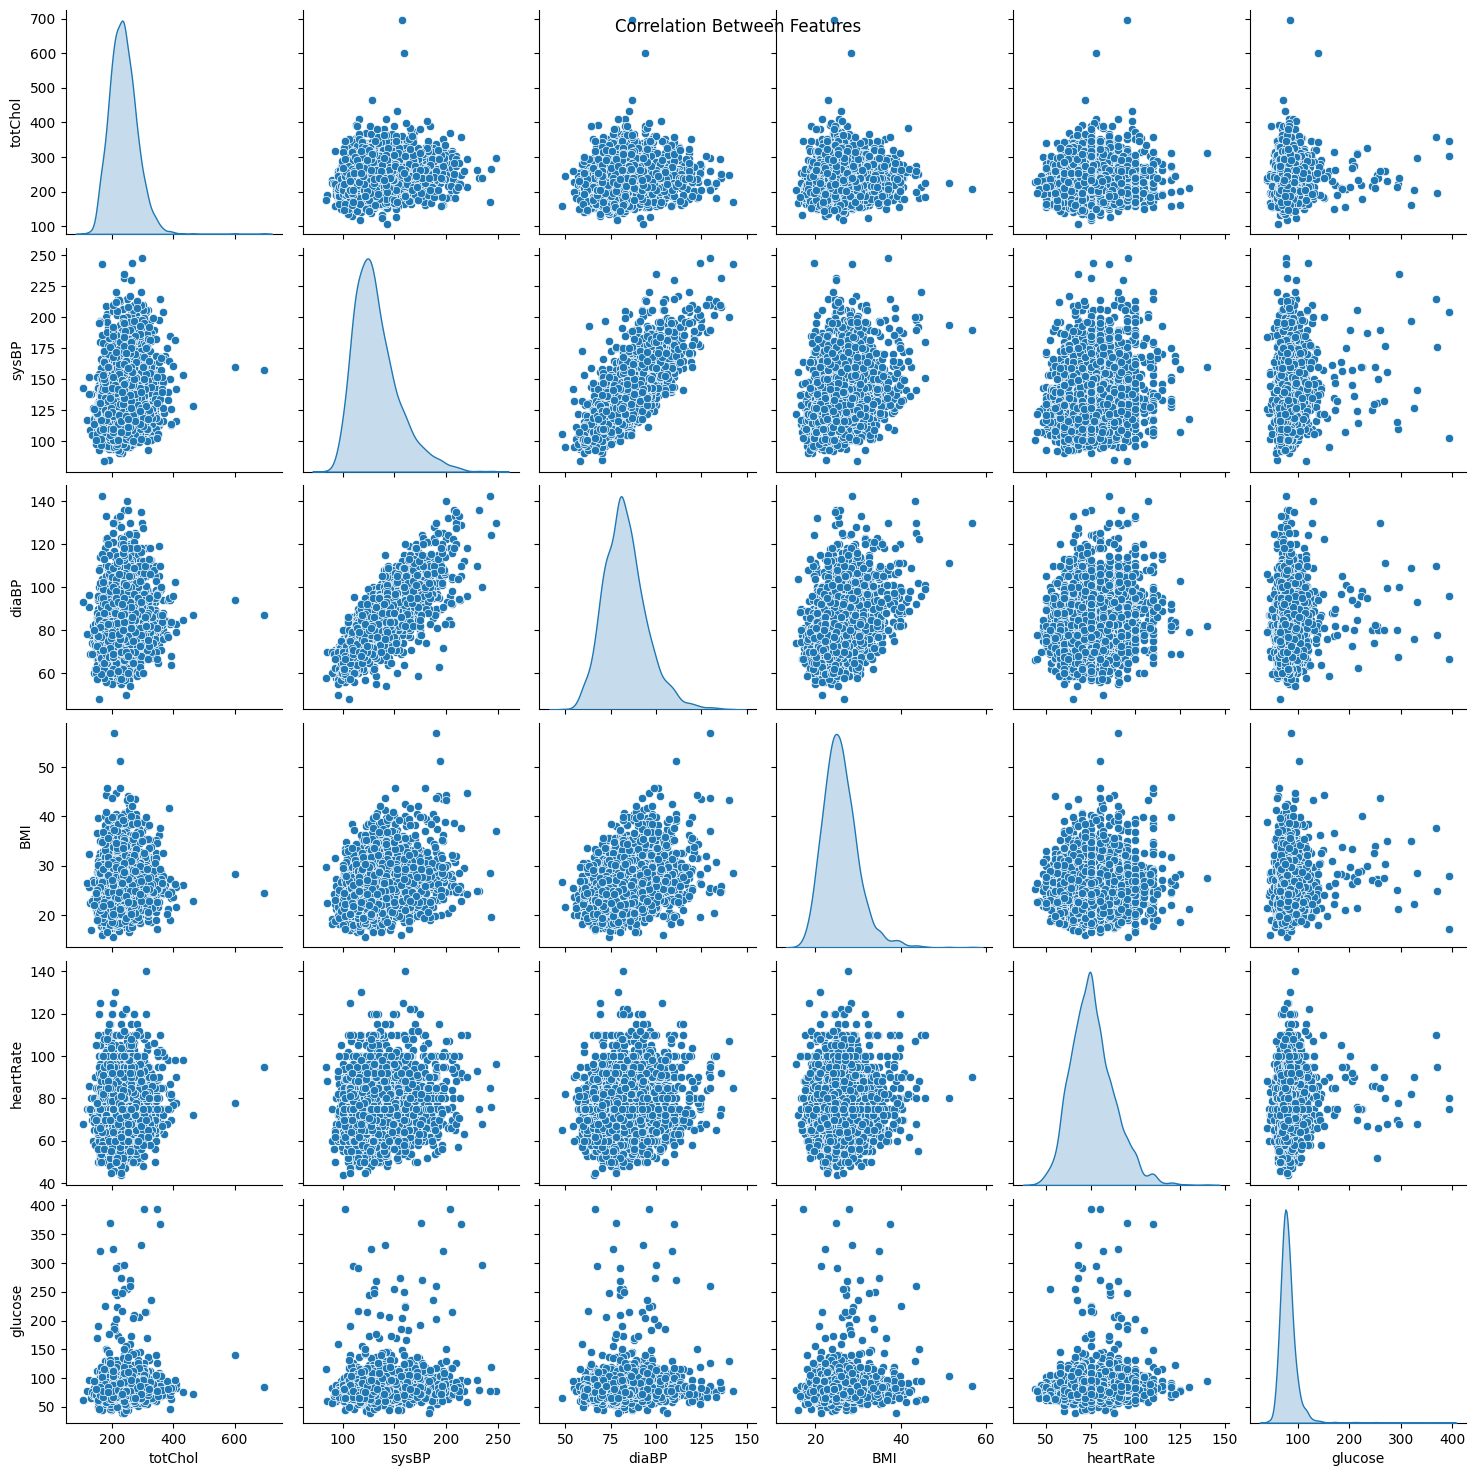

<Figure size 640x480 with 0 Axes>

In [19]:
## Correlation Pairplot
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'totChol':'glucose'], diag_kind='kde')

## Add title
plt.suptitle('Correlation Between Features')

## Show plot
plt.show()

## Save plot
plt.savefig('feature_correlation_pairplot.png', bbox_inches='tight', dpi=300)

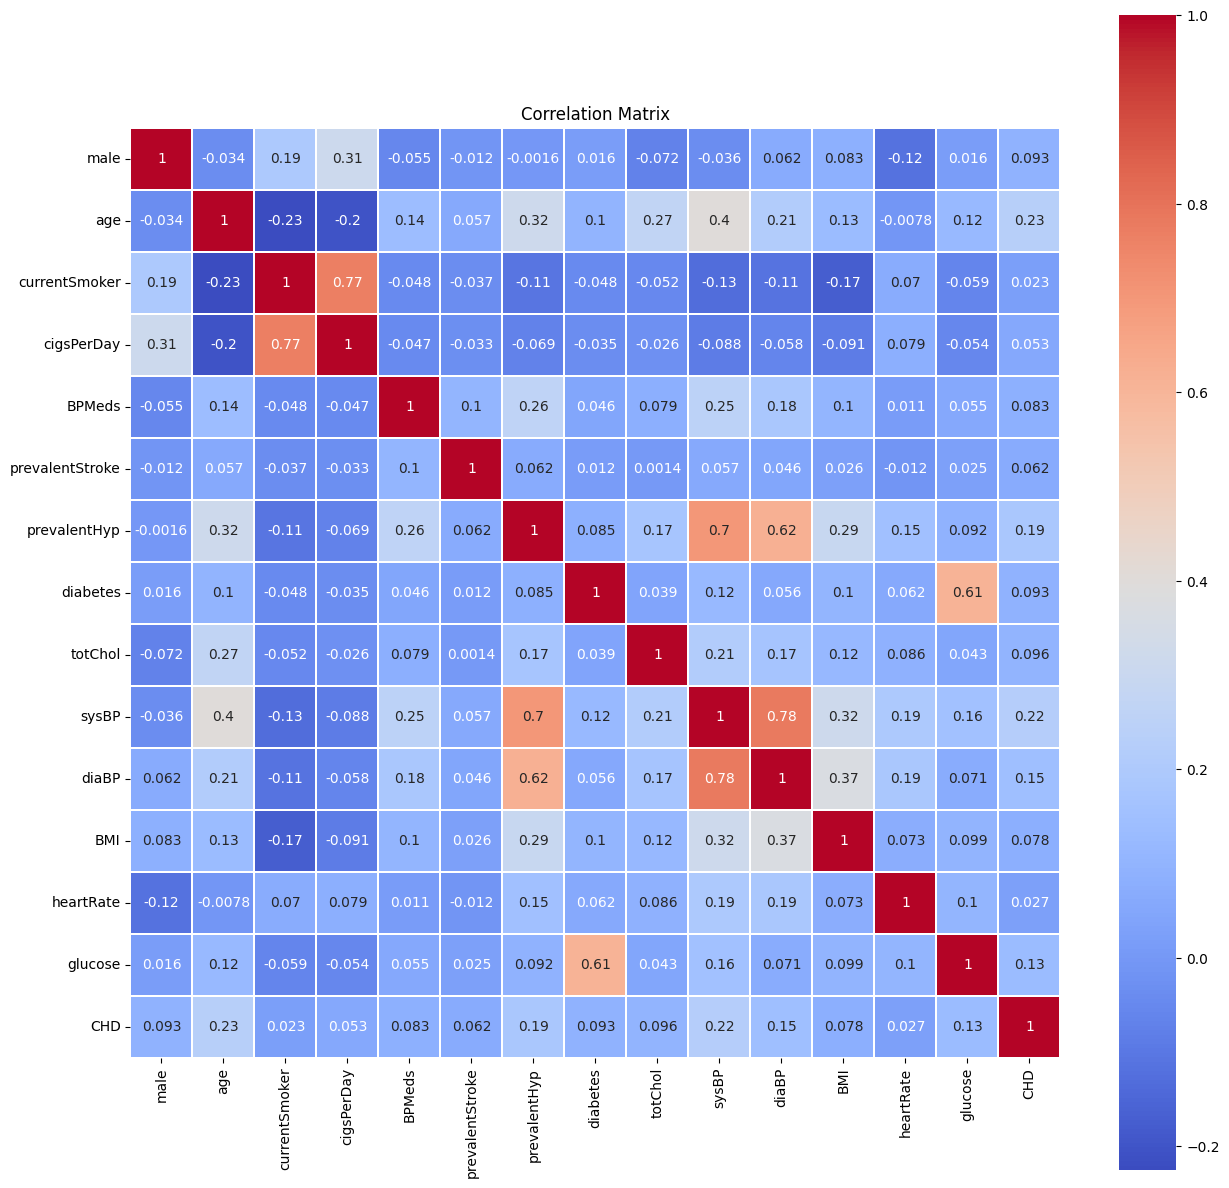

<Figure size 640x480 with 0 Axes>

In [20]:
## Correlation Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.1, cmap='coolwarm', square=True)

## Add title
plt.title('Correlation Matrix')

## Show plot
plt.show()

## Save plot
plt.savefig('correlation_matrix_heatmap.png', bbox_inches='tight', dpi=300)

In [21]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

train_data.drop(features_to_drop, axis=1, inplace=True)

In [22]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1,48,0.0,0.0,0,0,0,181.0,153.0,29.34,103.0,88.0,0
953,0,39,5.0,0.0,0,0,0,170.0,137.5,27.35,67.0,70.0,0
2584,0,43,1.0,0.0,0,0,0,256.0,129.0,25.89,96.0,72.0,0
3068,0,46,30.0,0.0,0,0,0,196.0,114.0,21.01,60.0,69.0,0
1826,0,38,0.0,0.0,0,0,0,167.0,102.5,22.58,60.0,57.0,0


### Outliers Checking

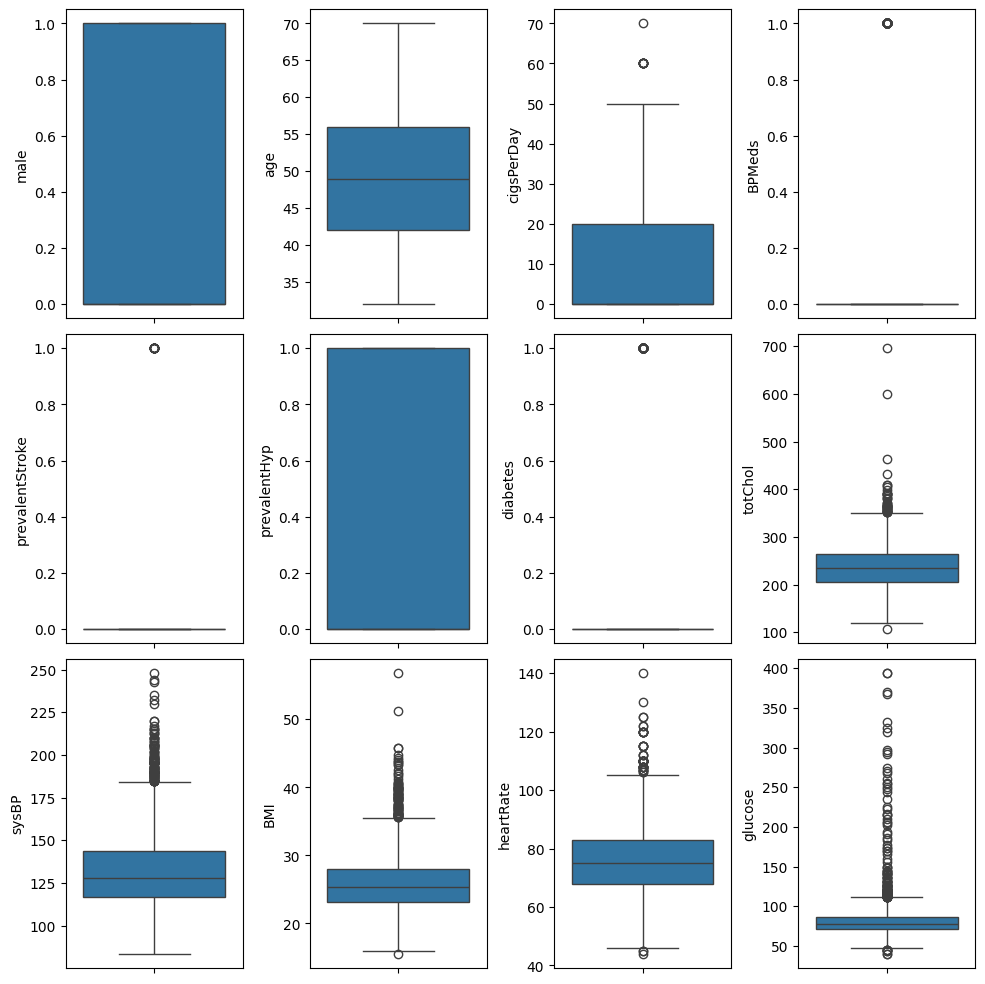

In [23]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [24]:
# Outliers handling
print('Number of training examples to be deleted for outliers removal is ',len(train_data[train_data['sysBP'] > 220]) + len(train_data[train_data['BMI'] > 43]) + len(
    train_data[train_data['heartRate'] > 125]) + len(train_data[train_data['glucose'] > 200]) + len(
    train_data[train_data['totChol'] > 450]))

Number of training examples to be deleted for outliers removal is  51


In [25]:
# deleting outliers

train_data = train_data[~(train_data['sysBP'] > 220)]
train_data = train_data[~(train_data['BMI'] > 43)]
train_data = train_data[~(train_data['heartRate'] > 125)]
train_data = train_data[~(train_data['glucose'] > 200)]
train_data = train_data[~(train_data['totChol'] > 450)]
print(train_data.shape)

(3597, 13)


### Normalisation Checking

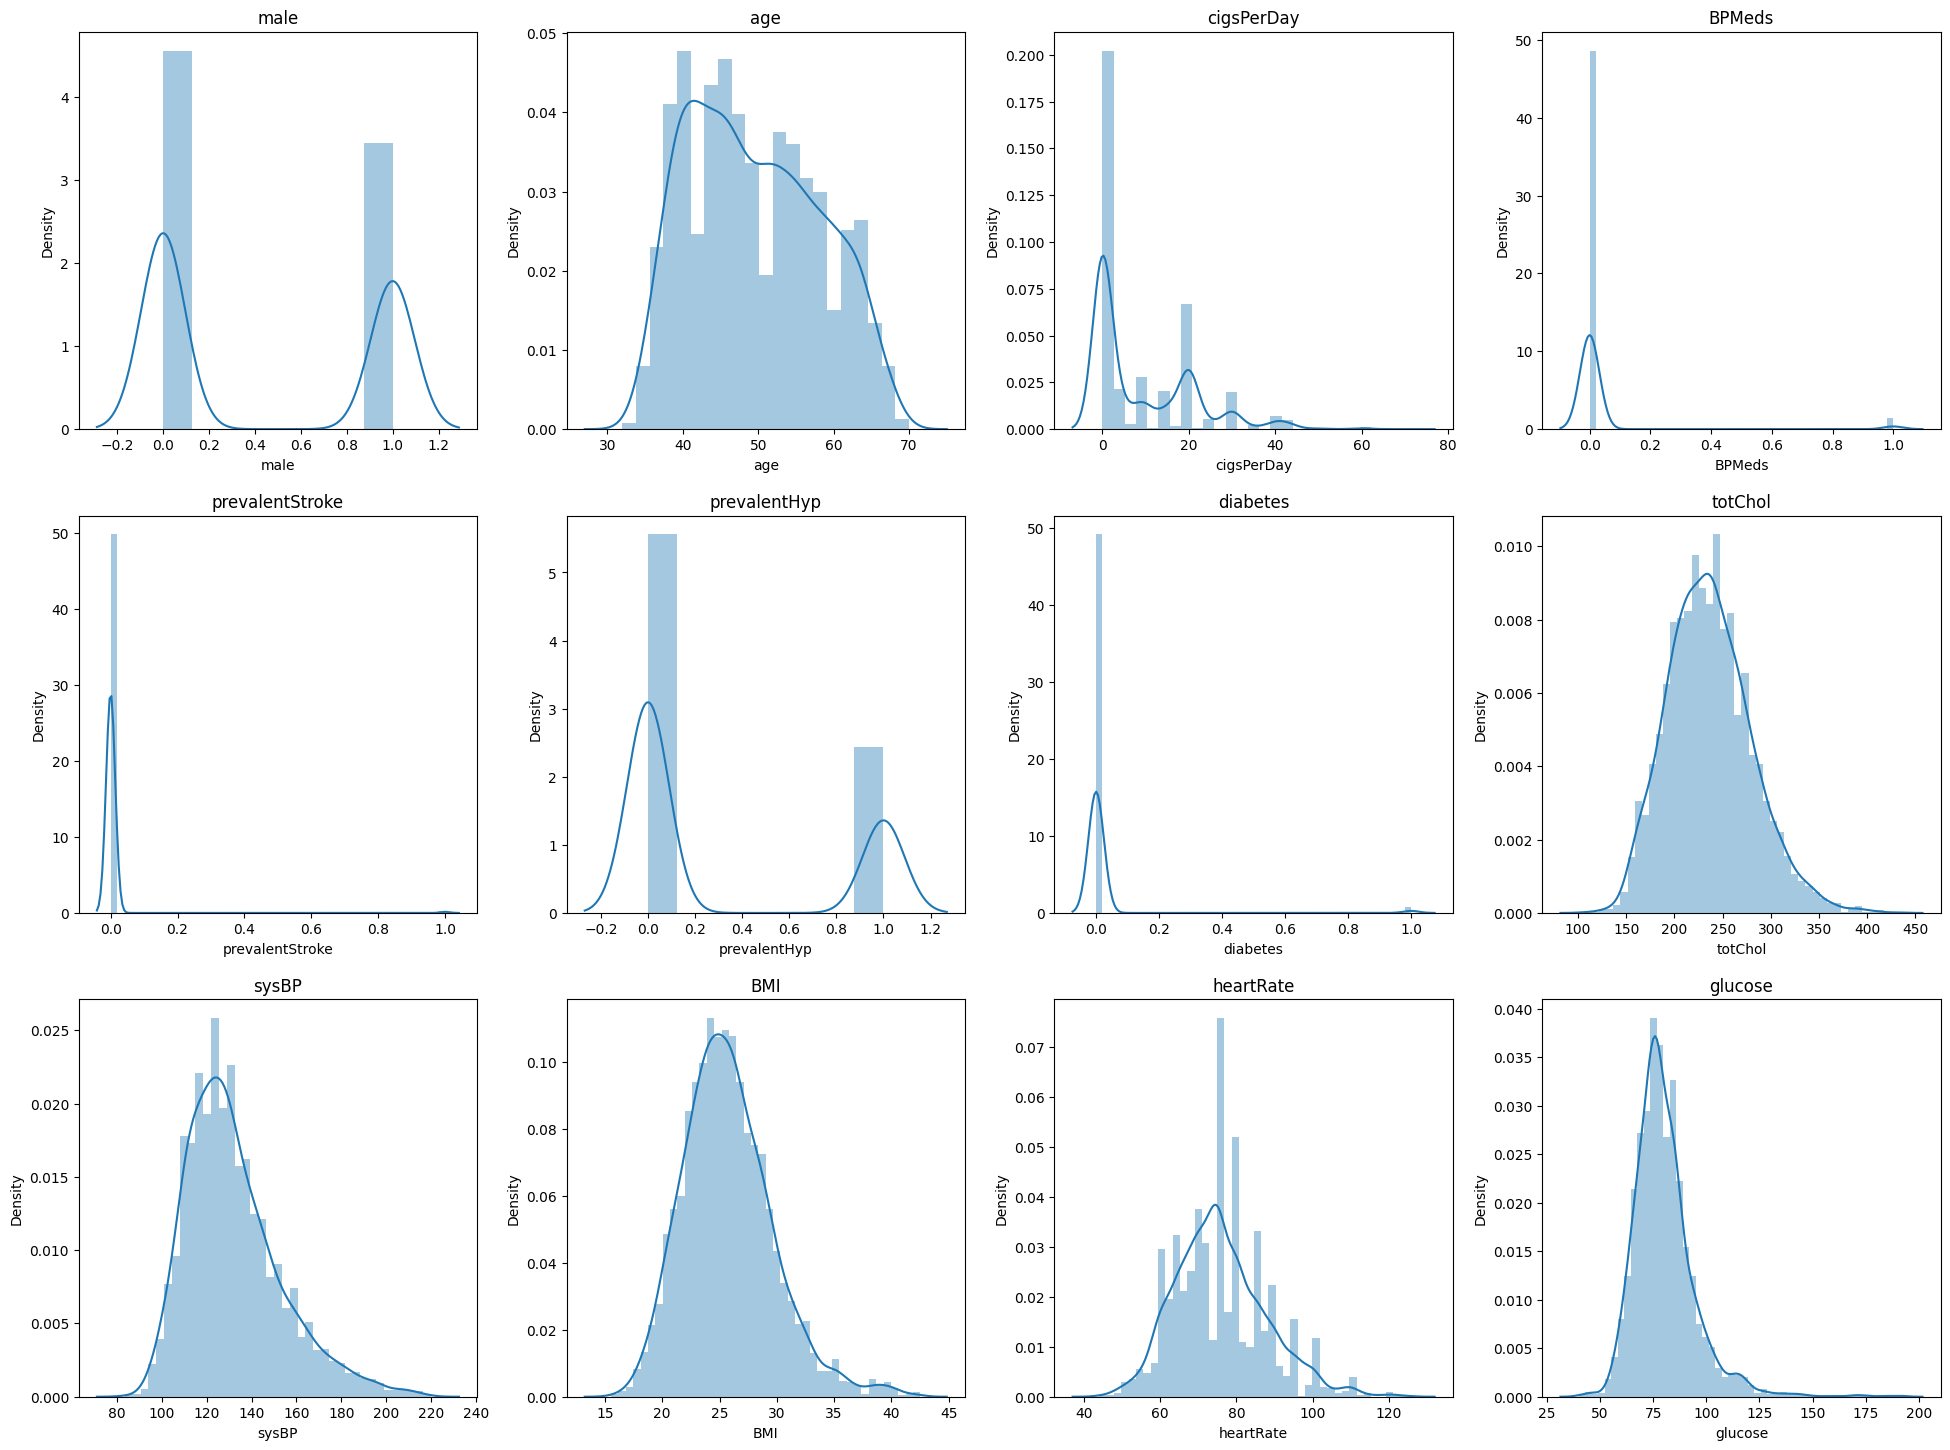

<Figure size 640x480 with 0 Axes>

In [26]:
## Distribution Plots
fig, ax = plt.subplots(figsize=(20,15), nrows=3, ncols=4)
ax = ax.flatten()

for i, (k, v) in enumerate(train_data.items()):
    if i >= 12:
        break
    sns.distplot(v, ax=ax[i])
    ax[i].set_title(k)

plt.tight_layout(pad=2.5, h_pad=1.5, w_pad=1.5)
plt.show()

## Save plot
plt.savefig('distribution_plots.png', bbox_inches='tight', dpi=300)

In [27]:
# Standardise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])

In [28]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1,-0.175233,-0.761009,0.0,0,0,0,-1.277480,0.988513,0.907151,2.283070,0.535724,0
953,0,-1.224008,-0.338581,0.0,0,0,0,-1.531345,0.262151,0.402882,-0.735745,-0.696980,0
2584,0,-0.757886,-0.676524,0.0,0,0,0,0.453419,-0.136176,0.032916,1.696078,-0.560013,0
3068,0,-0.408294,1.773560,0.0,0,0,0,-0.931300,-0.839107,-1.203683,-1.322737,-0.765464,0
1826,0,-1.340538,-0.761009,0.0,0,0,0,-1.600581,-1.378020,-0.805843,-1.322737,-1.587266,0
